In [1]:
from jitcdde import t
from parameters import *
import matplotlib.pyplot as plt
from msrDynamics.objects import Node, System

In [2]:
# params = [0.02187095, 0.0113666, 0.00104331, 0.00415982, 0.00266767, 0.0093217, 0.00080961, 0.00687754, 0.19685921, 0.00049369, 0.0741425] # sumsq_power
# params = [1.67805091e-01, 1.16384489e-02, 1.84339040e-04, 2.67694347e-02, \
#           1.00692327e-03, 6.89866494e-03, 4.13827966e-04, 9.72936906e-03, \
#           9.78502892e-01, 1.10738257e-03, 1.79379286e-02]

#all
params = [1.76062602e-01, 1.33401256e-02, 8.84481706e-04, 2.17107326e-02, 
          1.06450686e-03, 2.75078295e-02, 4.66376746e-04, 2.23549383e-02,
          7.38227668e-01, 1.83339068e-03, 6.83131280e-02, 7.77594444e+02]

# power
# params = [3.10927244e-02, 1.37767977e-02, 7.34003386e-04, 7.21939761e-03,
#           2.37009964e-03, 9.67166140e-03, 2.93826069e-04, 6.36341730e-03,
#           4.11660992e-01, 5.12259449e-04, 7.96121021e-02]

hA_ft_c, hA_tc_c, hA_mc_c, hA_ft_hx, hA_ht_hx, hA_ct_hx, hA_th_hxch, \
hA_ht_hxhw, hA_tw_hxhw, hA_ht_hxhwc, hA_tw_hxhwc, T0_c_m = params

T = np.arange(0,10000,0.1)

Instantiate System Object & Nodes

In [3]:
# ARE system        
ARE = System()

# CORE NODES
c_f1 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f1)
c_f2 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f2)
c_t1 = Node(m = m_t, scp = scp_t, y0 = T0_c_t1)
c_c1 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c1)
c_c2 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c2) 
c_m1 = Node(m = m_m_c, scp = scp_m, y0 = T0_c_m+50)
n = Node(y0 = n_frac0)
C1 = Node(y0 = C0[0])
C2 = Node(y0 = C0[1])
C3 = Node(y0 = C0[2])
C4 = Node(y0 = C0[3])
C5 = Node(y0 = C0[4])
C6 = Node(y0 = C0[5])
rho = Node(y0 = 0.00)

# add reactivity input
inserted = 0
def rho_insert(t):
    if (t<t_ins):
        return 0.0
    elif (t<(t_ins+insert_duration)):
        return ((t-t_ins))*(inserted/insert_duration) # linear
    elif (t < t_wd):
        return inserted
    elif (t < t_wd+insert_duration):
        return inserted-((t-t_wd))*(inserted/insert_duration) # linear
    else:
        return 0.0

rho_ext = ARE.add_input(rho_insert, T)

# FUEL-HELIUM HX1
hx_fh1_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1)
hx_fh1_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2)
hx_fh1_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1)
hx_fh1_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1)
hx_fh1_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2)

# FUEL-HELIUM HX2
hx_fh2_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1)
hx_fh2_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2)
hx_fh2_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1)
hx_fh2_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1)
hx_fh2_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2)

# COOLANT-HELIUM HX1
hx_ch1_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1)
hx_ch1_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2)
hx_ch1_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hch_t1)
hx_ch1_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1)
hx_ch1_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2)

# COOLANT-HELIUM HX2
hx_ch2_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1)
hx_ch2_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2)
hx_ch2_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hfh_t1)
hx_ch2_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1)
hx_ch2_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2)

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1)
hx_hwf1_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2)
hx_hwf1_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwf1_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1)
hx_hwf1_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2)

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1)
hx_hwf2_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2)
hx_hwf2_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwf2_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1)
hx_hwf2_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2)

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1)
hx_hwc1_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2)
hx_hwc1_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwc1_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1)
hx_hwc1_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2)

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1)
hx_hwc2_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2)
hx_hwc2_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwc2_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1)
hx_hwc2_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2)



In [4]:


ARE.add_nodes([c_f1,c_f2,c_t1,c_c1,c_c2,c_m1,n,C1,C2,C3,C4,C5,C6,rho,
              hx_fh1_f1,hx_fh1_f2,hx_fh1_t1,hx_fh1_h1,hx_fh1_h2,
              hx_fh2_f1,hx_fh2_f2,hx_fh2_t1,hx_fh2_h1,hx_fh2_h2,
              hx_ch1_c1,hx_ch1_c2,hx_ch1_t1,hx_ch1_h1,hx_ch1_h2,
              hx_ch2_c1,hx_ch2_c2,hx_ch2_t1,hx_ch2_h1,hx_ch2_h2,
              hx_hwf1_h1,hx_hwf1_h2,hx_hwf1_t1,hx_hwf1_w1,hx_hwf1_w2,
              hx_hwf2_h1,hx_hwf2_h2,hx_hwf2_t1,hx_hwf2_w1,hx_hwf2_w2,
              hx_hwc1_h1,hx_hwc1_h2,hx_hwc1_t1,hx_hwc1_w1,hx_hwc1_w2,
              hx_hwc2_h1,hx_hwc2_h2,hx_hwc2_t1,hx_hwc2_w1,hx_hwc2_w2,
              ])

Define Dynamics

In [5]:
# CORE
c_f1.set_dTdt_advective(source = (hx_fh1_f2.y(t-tau_hx_c_f)+hx_fh2_f2.y(t-tau_hx_c_f))/2) 
c_f1.set_dTdt_internal(source = n.y(), k = k_f1*P)
c_f1.set_dTdt_convective(source = [c_t1.y()], hA = [hA_ft_c/2])

c_f2.set_dTdt_advective(source = c_f1.y()) 
c_f2.set_dTdt_internal(source = n.y(), k = k_f2*P)
c_f2.dTdt_convective = c_f1.dTdt_convective 

c_t1.set_dTdt_convective(source = [c_f1.y(), c_c1.y()], hA = [hA_ft_c,hA_tc_c])

c_c1.set_dTdt_advective(source = (hx_ch1_c2.y(t-tau_c_hx_f)+hx_ch2_c2.y(t-tau_c_hx_f))/2)
c_c1.set_dTdt_convective(source = [c_t1.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_c2.set_dTdt_advective(source = c_c1.y())
c_c2.dTdt_convective = c_c1.dTdt_convective

c_m1.set_dTdt_internal(source = n.y(), k = k_m*P)
c_m1.set_dTdt_convective(source = [c_c1.y()], hA = [hA_mc_c])

n.set_dndt(rho.y()+rho_ext, beta_t, Lam, lam, [C1.y(), C2.y(), C3.y(), C4.y(), C5.y(), C6.y()])
C1.set_dcdt(n.y(), beta[0], Lam, lam[0], tau_c, tau_l)
C2.set_dcdt(n.y(), beta[1], Lam, lam[1], tau_c, tau_l)
C3.set_dcdt(n.y(), beta[2], Lam, lam[2], tau_c, tau_l)
C4.set_dcdt(n.y(), beta[3], Lam, lam[3], tau_c, tau_l)
C5.set_dcdt(n.y(), beta[4], Lam, lam[4], tau_c, tau_l)
C6.set_dcdt(n.y(), beta[5], Lam, lam[5], tau_c, tau_l)
rho.set_drdt([c_f1.dydt(),c_f2.dydt(),c_m1.dydt(),c_c1.dydt(),c_c2.dydt()],[a_f/2,a_f/2,a_b,a_c/2,a_c/2])

# FUEL-HELIUM HX1
hx_fh1_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh1_f1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ft_hx/2])

hx_fh1_f2.set_dTdt_advective(source = hx_fh1_f1.y())
hx_fh1_f2.dTdt_convective = hx_fh1_f1.dTdt_convective

hx_fh1_t1.set_dTdt_convective(source = [hx_fh1_f1.y(),hx_fh1_h1.y()],hA = [hA_ft_hx,hA_ht_hx])

hx_fh1_h1.set_dTdt_advective(source = hx_hwf2_h2.y(t-tau_h))
hx_fh1_h1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ht_hx/2])

hx_fh1_h2.set_dTdt_advective(source = hx_fh1_h1.y())
hx_fh1_h2.dTdt_convective = hx_fh1_h1.dTdt_convective

# FUEL-HELIUM HX2
hx_fh2_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh2_f1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ft_hx/2])

hx_fh2_f2.set_dTdt_advective(source = hx_fh2_f1.y())
hx_fh2_f2.dTdt_convective = hx_fh2_f1.dTdt_convective

hx_fh2_t1.set_dTdt_convective(source = [hx_fh2_f1.y(),hx_fh2_h1.y()],hA = [hA_ft_hx,hA_ht_hx])

hx_fh2_h1.set_dTdt_advective(source = hx_hwf1_h2.y())
hx_fh2_h1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ht_hx/2])

hx_fh2_h2.set_dTdt_advective(source = hx_fh2_h1.y())
hx_fh2_h2.dTdt_convective = hx_fh2_h1.dTdt_convective

# COOLANT-HELIUM HX1
hx_ch1_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch1_c1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_ct_hx/2])

hx_ch1_c2.set_dTdt_advective(source = hx_ch1_c1.y())
hx_ch1_c2.dTdt_convective = hx_ch1_c1.dTdt_convective

hx_ch1_t1.set_dTdt_convective(source = [hx_ch1_c1.y(),hx_ch1_h1.y()],hA = [hA_ct_hx,hA_th_hxch])

hx_ch1_h1.set_dTdt_advective(source = hx_hwc1_h2.y(t-tau_h))
hx_ch1_h1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_th_hxch/2])

hx_ch1_h2.set_dTdt_advective(source = hx_ch1_h1.y())
hx_ch1_h2.dTdt_convective = hx_ch1_h1.dTdt_convective

# COOLANT-HELIUM HX2
hx_ch2_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch2_c1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_ct_hx/2])

hx_ch2_c2.set_dTdt_advective(source = hx_ch2_c1.y())
hx_ch2_c2.dTdt_convective = hx_ch2_c1.dTdt_convective

hx_ch2_t1.set_dTdt_convective(source = [hx_ch2_c1.y(),hx_ch2_h1.y()],hA = [hA_ct_hx,hA_th_hxch])

hx_ch2_h1.set_dTdt_advective(source = hx_hwc2_h2.y(t-tau_h))
hx_ch2_h1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_th_hxch/2])

hx_ch2_h2.set_dTdt_advective(source = hx_ch2_h1.y())
hx_ch2_h2.dTdt_convective = hx_ch2_h1.dTdt_convective

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1.set_dTdt_advective(source = hx_fh1_h2.y())
hx_hwf1_h1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf1_h2.set_dTdt_advective(source = hx_hwf1_h1.y())
hx_hwf1_h2.dTdt_convective = hx_hwf1_h1.dTdt_convective

hx_hwf1_t1.set_dTdt_convective(source = [hx_hwf1_h1.y(),hx_hwf1_w1.y()],hA = [hA_ht_hxhw,hA_tw_hxhw])

hx_hwf1_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf1_w1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf1_w2.set_dTdt_advective(source = hx_hwf1_w1.y())
hx_hwf1_w2.dTdt_convective = hx_hwf1_w1.dTdt_convective

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1.set_dTdt_advective(source = hx_fh2_h2.y())
hx_hwf2_h1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf2_h2.set_dTdt_advective(source = hx_hwf2_h1.y())
hx_hwf2_h2.dTdt_convective = hx_hwf2_h1.dTdt_convective

hx_hwf2_t1.set_dTdt_convective(source = [hx_hwf2_h1.y(),hx_hwf2_w1.y()],hA = [hA_ht_hxhw,hA_tw_hxhw])

hx_hwf2_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf2_w1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf2_w2.set_dTdt_advective(source = hx_hwf2_w1.y())
hx_hwf2_w2.dTdt_convective = hx_hwf2_w1.dTdt_convective

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1.set_dTdt_advective(source = hx_ch1_h2.y())
hx_hwc1_h1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_ht_hxhwc/2])

hx_hwc1_h2.set_dTdt_advective(source = hx_hwc1_h1.y())
hx_hwc1_h2.dTdt_convective = hx_hwc1_h1.dTdt_convective

hx_hwc1_t1.set_dTdt_convective(source = [hx_hwc1_h1.y(),hx_hwc1_w1.y()],hA = [hA_ht_hxhwc,hA_tw_hxhwc])

hx_hwc1_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc1_w1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc1_w2.set_dTdt_advective(source = hx_hwc1_w1.y())
hx_hwc1_w2.dTdt_convective = hx_hwc1_w1.dTdt_convective

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1.set_dTdt_advective(source = hx_ch2_h2.y())
hx_hwc2_h1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_ht_hxhwc/2]) 

hx_hwc2_h2.set_dTdt_advective(source = hx_hwc2_h1.y())
hx_hwc2_h2.dTdt_convective = hx_hwc2_h1.dTdt_convective

hx_hwc2_t1.set_dTdt_convective(source = [hx_hwc2_h1.y(),hx_hwc2_w1.y()],hA = [hA_ht_hxhwc,hA_tw_hxhwc])

hx_hwc2_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc2_w1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc2_w2.set_dTdt_advective(source = hx_hwc2_w1.y())
hx_hwc2_w2.dTdt_convective = hx_hwc2_w1.dTdt_convective


In [6]:
# solve system 
T = np.arange(0,10000,0.1)
sol_jit = ARE.solve(T)

Generating, compiling, and loading C code.
Using default integration parameters.


/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did no

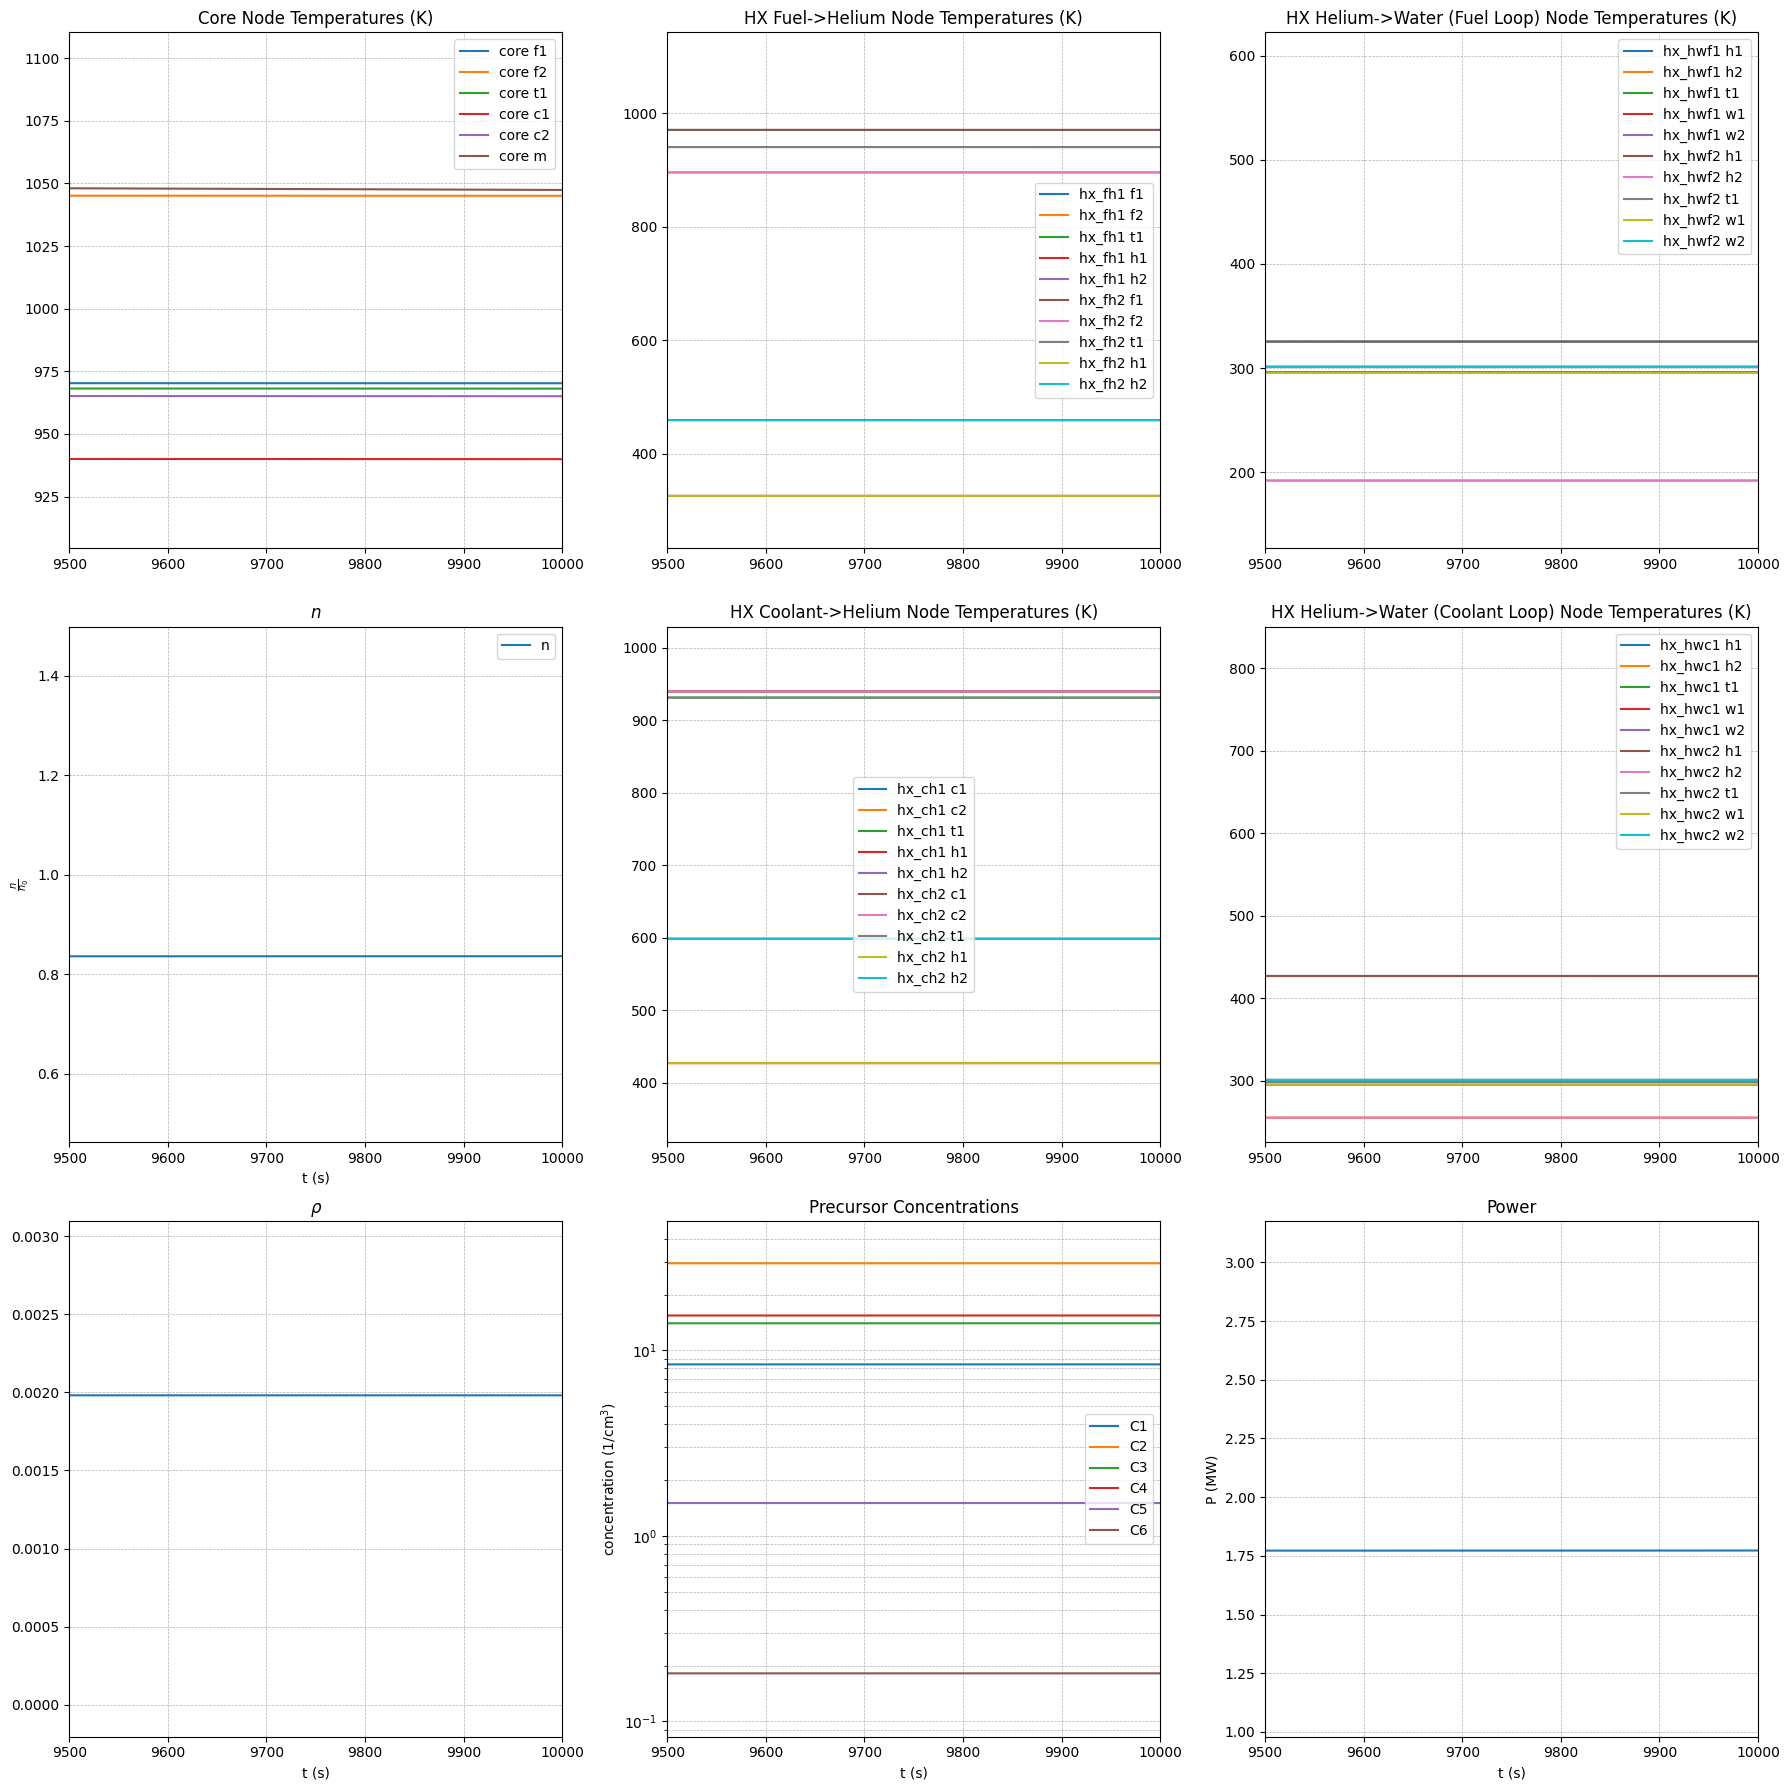

In [7]:
fig,axs = plt.subplots(3,3,figsize=(18,18))

t_0 = 9500
t_f = 10000

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive']

# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_xlim([t_0, t_f])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)
    ax.set_yscale(y_scale)

# Core Node Temperatures
update_axis_style(axs[0, 0], "Core Node Temperatures (K)")
axs[0,0].set_xlim([t_0,t_f])
axs[0,0].plot(T,c_f1.y_out,label="core f1") 
axs[0,0].plot(T,c_f2.y_out,label="core f2") 
axs[0,0].plot(T,c_t1.y_out,label="core t1")  
axs[0,0].plot(T,c_c1.y_out,label="core c1")
axs[0,0].plot(T,c_c2.y_out,label="core c2")
axs[0,0].plot(T,c_m1.y_out,label="core m")
axs[0,0].legend()

update_axis_style(axs[0, 1], "HX Fuel->Helium Node Temperatures (K)")
axs[0,1].set_xlim([t_0,t_f])
axs[0,1].plot(T,hx_fh1_f1.y_out,label="hx_fh1 f1") 
axs[0,1].plot(T,hx_fh1_f2.y_out,label="hx_fh1 f2") 
axs[0,1].plot(T,hx_fh1_t1.y_out,label="hx_fh1 t1")  
axs[0,1].plot(T,hx_fh1_h1.y_out,label="hx_fh1 h1")
axs[0,1].plot(T,hx_fh1_h2.y_out,label="hx_fh1 h2")
axs[0,1].plot(T,hx_fh2_f1.y_out,label="hx_fh2 f1") 
axs[0,1].plot(T,hx_fh2_f2.y_out,label="hx_fh2 f2") 
axs[0,1].plot(T,hx_fh2_t1.y_out,label="hx_fh2 t1")  
axs[0,1].plot(T,hx_fh2_h1.y_out,label="hx_fh2 h1")
axs[0,1].plot(T,hx_fh2_h2.y_out,label="hx_fh2 h2")
axs[0,1].legend()

update_axis_style(axs[0, 2])
axs[0,2].set_xlim([t_0,t_f])
axs[0,2].plot(T,hx_hwf1_h1.y_out,label="hx_hwf1 h1") 
axs[0,2].plot(T,hx_hwf1_h2.y_out,label="hx_hwf1 h2") 
axs[0,2].plot(T,hx_hwf1_t1.y_out,label="hx_hwf1 t1") 
axs[0,2].plot(T,hx_hwf1_w1.y_out,label="hx_hwf1 w1") 
axs[0,2].plot(T,hx_hwf1_w2.y_out,label="hx_hwf1 w2") 
axs[0,2].plot(T,hx_hwf2_h1.y_out,label="hx_hwf2 h1") 
axs[0,2].plot(T,hx_hwf2_h2.y_out,label="hx_hwf2 h2") 
axs[0,2].plot(T,hx_hwf2_t1.y_out,label="hx_hwf2 t1") 
axs[0,2].plot(T,hx_hwf2_w1.y_out,label="hx_hwf2 w1") 
axs[0,2].plot(T,hx_hwf2_w2.y_out,label="hx_hwf2 w2") 
axs[0,2].legend()
axs[0,2].set_title("HX Helium->Water (Fuel Loop) Node Temperatures (K)")

update_axis_style(axs[1, 1])
axs[1,1].set_xlim([t_0,t_f])
axs[1,1].plot(T,hx_ch1_c1.y_out,label="hx_ch1 c1")
axs[1,1].plot(T,hx_ch1_c1.y_out,label="hx_ch1 c2") 
axs[1,1].plot(T,hx_ch1_t1.y_out,label="hx_ch1 t1") 
axs[1,1].plot(T,hx_ch1_h1.y_out,label="hx_ch1 h1") 
axs[1,1].plot(T,hx_ch1_h2.y_out,label="hx_ch1 h2") 
axs[1,1].plot(T,hx_ch2_c1.y_out,label="hx_ch2 c1")
axs[1,1].plot(T,hx_ch2_c1.y_out,label="hx_ch2 c2") 
axs[1,1].plot(T,hx_ch2_t1.y_out,label="hx_ch2 t1") 
axs[1,1].plot(T,hx_ch2_h1.y_out,label="hx_ch2 h1") 
axs[1,1].plot(T,hx_ch2_h2.y_out,label="hx_ch2 h2") 
axs[1,1].legend()
axs[1,1].legend()
axs[1,1].set_title("HX Coolant->Helium Node Temperatures (K)")

update_axis_style(axs[1, 2])
axs[1,2].set_xlim([t_0,t_f])
axs[1,2].plot(T,hx_hwc1_h1.y_out,label="hx_hwc1 h1")
axs[1,2].plot(T,hx_hwc1_h2.y_out,label="hx_hwc1 h2")
axs[1,2].plot(T,hx_hwc1_t1.y_out,label="hx_hwc1 t1")
axs[1,2].plot(T,hx_hwc1_w1.y_out,label="hx_hwc1 w1")
axs[1,2].plot(T,hx_hwc1_w2.y_out,label="hx_hwc1 w2") 
axs[1,2].plot(T,hx_hwc2_h1.y_out,label="hx_hwc2 h1")
axs[1,2].plot(T,hx_hwc2_h2.y_out,label="hx_hwc2 h2")
axs[1,2].plot(T,hx_hwc2_t1.y_out,label="hx_hwc2 t1")
axs[1,2].plot(T,hx_hwc2_w1.y_out,label="hx_hwc2 w1")
axs[1,2].plot(T,hx_hwc2_w2.y_out,label="hx_hwc2 w2") 
axs[1,2].legend()
axs[1,2].set_title("HX Helium->Water (Coolant Loop) Node Temperatures (K)")

update_axis_style(axs[1, 0])
axs[1,0].plot(T,n.y_out,label="n") 
axs[1,0].set_xlabel("t (s)")
axs[1,0].set_title(r"$n$")
axs[1,0].set_ylabel(r"$\frac{n}{n_0}$")
axs[1,0].set_xlim([t_0,t_f])
axs[1,0].legend()

update_axis_style(axs[2, 0])
axs[2,0].plot(T,rho.y_out,label="rho") 
axs[2,0].set_xlabel("t (s)")
axs[2,0].set_title(r"$\rho$")
axs[2,0].set_xlim([t_0,t_f])

update_axis_style(axs[2, 1])
axs[2,1].plot(T,C1.y_out,label="C1") 
axs[2,1].plot(T,C2.y_out,label="C2") 
axs[2,1].plot(T,C3.y_out,label="C3") 
axs[2,1].plot(T,C4.y_out,label="C4") 
axs[2,1].plot(T,C5.y_out,label="C5") 
axs[2,1].plot(T,C6.y_out,label="C6") 
axs[2,1].legend()
axs[2,1].set_xlabel("t (s)")
axs[2,1].set_yscale("log")
axs[2,1].set_ylabel(r"concentration (1/cm$^3$)")
axs[2,1].legend(loc="right")
axs[2,1].set_title("Precursor Concentrations")
axs[2,1].set_xlim([t_0,t_f])

update_axis_style(axs[2, 2])
axs[2,2].plot(T,[k*P for k in n.y_out],label="Power") 
axs[2,2].set_xlabel("t (s)")
axs[2,2].set_title("Power")
axs[2,2].set_ylabel("P (MW)")
axs[2,2].set_xlim([t_0,t_f])

plt.tight_layout()
plt.show()

In [8]:
P*n.y_out[-1]

1.772657879741112

In [10]:
rho.y0 = 0.0045
sol_jit2 = ARE.solve(T)

Generating, compiling, and loading C code.
Using default integration parameters.


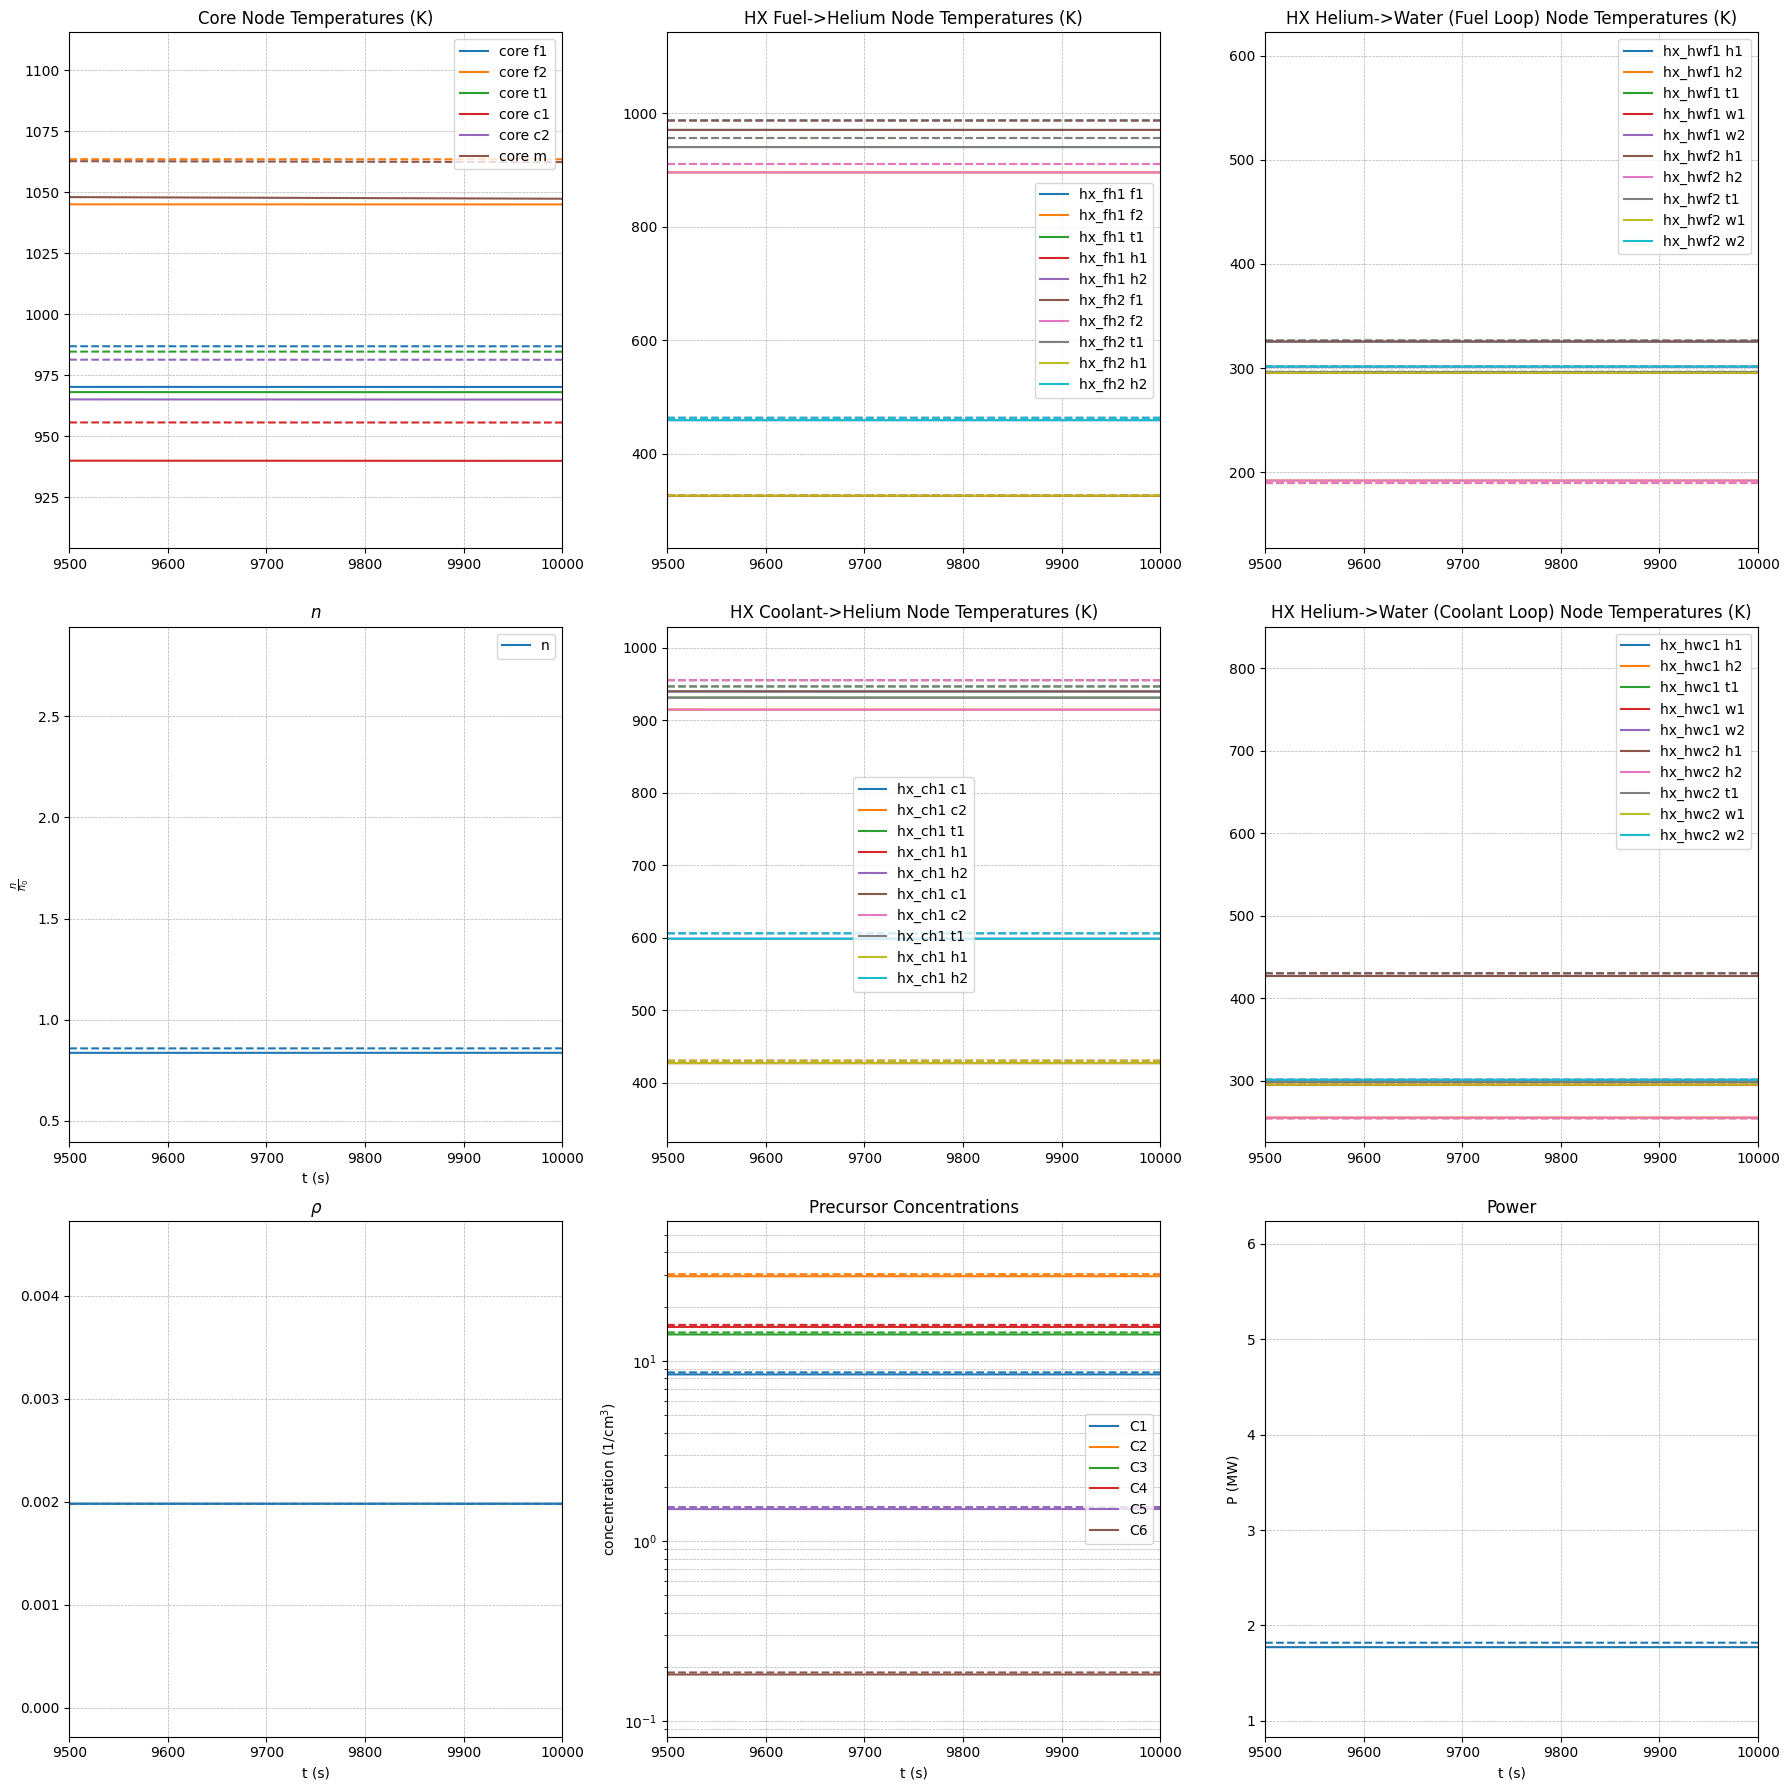

In [11]:
fig,axs = plt.subplots(3,3,figsize=(18,18))

t_0 = 9500
t_f = 10000

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_xlim([t_0, t_f])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)
    ax.set_yscale(y_scale)

# Core Node Temperatures
update_axis_style(axs[0, 0], "Core Node Temperatures (K)")
axs[0,0].set_xlim([t_0,t_f])
axs[0,0].plot(T,[s[c_f1.index] for s in sol_jit],label="core f1",color=colors[0]) 
axs[0,0].plot(T,[s[c_f2.index] for s in sol_jit],label="core f2",color=colors[1]) 
axs[0,0].plot(T,[s[c_t1.index] for s in sol_jit],label="core t1",color=colors[2])  
axs[0,0].plot(T,[s[c_c1.index] for s in sol_jit],label="core c1",color=colors[3])
axs[0,0].plot(T,[s[c_c2.index] for s in sol_jit],label="core c2",color=colors[4])
axs[0,0].plot(T,[s[c_m1.index] for s in sol_jit],label="core m",color=colors[5])
axs[0,0].plot(T,c_f1.y_out,linestyle="--",color=colors[0]) 
axs[0,0].plot(T,c_f2.y_out,linestyle="--",color=colors[1]) 
axs[0,0].plot(T,c_t1.y_out,linestyle="--",color=colors[2])  
axs[0,0].plot(T,c_c1.y_out,linestyle="--",color=colors[3])
axs[0,0].plot(T,c_c2.y_out,linestyle="--",color=colors[4])
axs[0,0].plot(T,c_m1.y_out,linestyle="--",color=colors[5])
axs[0,0].legend()

update_axis_style(axs[0, 1], "HX Fuel->Helium Node Temperatures (K)")
axs[0,1].set_xlim([t_0,t_f])
axs[0,1].plot(T,[s[hx_fh1_f1.index] for s in sol_jit],label="hx_fh1 f1",color=colors[0])
axs[0,1].plot(T,[s[hx_fh1_f2.index] for s in sol_jit],label="hx_fh1 f2",color=colors[1])
axs[0,1].plot(T,[s[hx_fh1_t1.index] for s in sol_jit],label="hx_fh1 t1",color=colors[2])
axs[0,1].plot(T,[s[hx_fh1_h1.index] for s in sol_jit],label="hx_fh1 h1",color=colors[3])
axs[0,1].plot(T,[s[hx_fh1_h2.index] for s in sol_jit],label="hx_fh1 h2",color=colors[4])
axs[0,1].plot(T,[s[hx_fh2_f1.index] for s in sol_jit],label="hx_fh2 f1",color=colors[5])
axs[0,1].plot(T,[s[hx_fh2_f2.index] for s in sol_jit],label="hx_fh2 f2",color=colors[6])
axs[0,1].plot(T,[s[hx_fh2_t1.index] for s in sol_jit],label="hx_fh2 t1",color=colors[7])
axs[0,1].plot(T,[s[hx_fh2_h1.index] for s in sol_jit],label="hx_fh2 h1",color=colors[8])
axs[0,1].plot(T,[s[hx_fh2_h2.index] for s in sol_jit],label="hx_fh2 h2",color=colors[9]) 
axs[0,1].plot(T,hx_fh1_f1.y_out,linestyle="--",color=colors[0]) 
axs[0,1].plot(T,hx_fh1_f2.y_out,linestyle="--",color=colors[1]) 
axs[0,1].plot(T,hx_fh1_t1.y_out,linestyle="--",color=colors[2])  
axs[0,1].plot(T,hx_fh1_h1.y_out,linestyle="--",color=colors[3])
axs[0,1].plot(T,hx_fh1_h2.y_out,linestyle="--",color=colors[4])
axs[0,1].plot(T,hx_fh2_f1.y_out,linestyle="--",color=colors[5]) 
axs[0,1].plot(T,hx_fh2_f2.y_out,linestyle="--",color=colors[6]) 
axs[0,1].plot(T,hx_fh2_t1.y_out,linestyle="--",color=colors[7])  
axs[0,1].plot(T,hx_fh2_h1.y_out,linestyle="--",color=colors[8])
axs[0,1].plot(T,hx_fh2_h2.y_out,linestyle="--",color=colors[9])
axs[0,1].legend()

update_axis_style(axs[0, 2])
axs[0,2].set_xlim([t_0,t_f])
axs[0,2].plot(T,[s[hx_hwf1_h1.index] for s in sol_jit],label="hx_hwf1 h1",color=colors[0])
axs[0,2].plot(T,[s[hx_hwf1_h2.index] for s in sol_jit],label="hx_hwf1 h2",color=colors[1])
axs[0,2].plot(T,[s[hx_hwf1_t1.index] for s in sol_jit],label="hx_hwf1 t1",color=colors[2])
axs[0,2].plot(T,[s[hx_hwf1_w1.index] for s in sol_jit],label="hx_hwf1 w1",color=colors[3])
axs[0,2].plot(T,[s[hx_hwf1_w2.index] for s in sol_jit],label="hx_hwf1 w2",color=colors[4])
axs[0,2].plot(T,[s[hx_hwf2_h1.index] for s in sol_jit],label="hx_hwf2 h1",color=colors[5])
axs[0,2].plot(T,[s[hx_hwf2_h2.index] for s in sol_jit],label="hx_hwf2 h2",color=colors[6])
axs[0,2].plot(T,[s[hx_hwf2_t1.index] for s in sol_jit],label="hx_hwf2 t1",color=colors[7])
axs[0,2].plot(T,[s[hx_hwf2_w1.index] for s in sol_jit],label="hx_hwf2 w1",color=colors[8])
axs[0,2].plot(T,[s[hx_hwf2_w2.index] for s in sol_jit],label="hx_hwf2 w2",color=colors[9])
axs[0,2].plot(T,hx_hwf1_h1.y_out,linestyle="--") 
axs[0,2].plot(T,hx_hwf1_h2.y_out,linestyle="--") 
axs[0,2].plot(T,hx_hwf1_t1.y_out,linestyle="--") 
axs[0,2].plot(T,hx_hwf1_w1.y_out,linestyle="--") 
axs[0,2].plot(T,hx_hwf1_w2.y_out,linestyle="--") 
axs[0,2].plot(T,hx_hwf2_h1.y_out,linestyle="--") 
axs[0,2].plot(T,hx_hwf2_h2.y_out,linestyle="--") 
axs[0,2].plot(T,hx_hwf2_t1.y_out,linestyle="--") 
axs[0,2].plot(T,hx_hwf2_w1.y_out,linestyle="--") 
axs[0,2].plot(T,hx_hwf2_w2.y_out,linestyle="--") 
axs[0,2].legend()
axs[0,2].set_title("HX Helium->Water (Fuel Loop) Node Temperatures (K)")

update_axis_style(axs[1, 1])
axs[1,1].set_xlim([t_0,t_f])
axs[1,1].plot(T,[s[hx_ch1_c1.index] for s in sol_jit],label="hx_ch1 c1",color=colors[0])
axs[1,1].plot(T,[s[hx_ch1_c2.index] for s in sol_jit],label="hx_ch1 c2",color=colors[1])
axs[1,1].plot(T,[s[hx_ch1_t1.index] for s in sol_jit],label="hx_ch1 t1",color=colors[2])
axs[1,1].plot(T,[s[hx_ch1_h1.index] for s in sol_jit],label="hx_ch1 h1",color=colors[3])
axs[1,1].plot(T,[s[hx_ch1_h2.index] for s in sol_jit],label="hx_ch1 h2",color=colors[4])
axs[1,1].plot(T,[s[hx_ch2_c1.index] for s in sol_jit],label="hx_ch1 c1",color=colors[5])
axs[1,1].plot(T,[s[hx_ch2_c2.index] for s in sol_jit],label="hx_ch1 c2",color=colors[6])
axs[1,1].plot(T,[s[hx_ch2_t1.index] for s in sol_jit],label="hx_ch1 t1",color=colors[7])
axs[1,1].plot(T,[s[hx_ch2_h1.index] for s in sol_jit],label="hx_ch1 h1",color=colors[8])
axs[1,1].plot(T,[s[hx_ch2_h2.index] for s in sol_jit],label="hx_ch1 h2",color=colors[9])
axs[1,1].plot(T,hx_ch1_c1.y_out,linestyle="--",color=colors[0])
axs[1,1].plot(T,hx_ch1_c1.y_out,linestyle="--",color=colors[1]) 
axs[1,1].plot(T,hx_ch1_t1.y_out,linestyle="--",color=colors[2]) 
axs[1,1].plot(T,hx_ch1_h1.y_out,linestyle="--",color=colors[3]) 
axs[1,1].plot(T,hx_ch1_h2.y_out,linestyle="--",color=colors[4]) 
axs[1,1].plot(T,hx_ch2_c1.y_out,linestyle="--",color=colors[5])
axs[1,1].plot(T,hx_ch2_c1.y_out,linestyle="--",color=colors[6]) 
axs[1,1].plot(T,hx_ch2_t1.y_out,linestyle="--",color=colors[7]) 
axs[1,1].plot(T,hx_ch2_h1.y_out,linestyle="--",color=colors[8]) 
axs[1,1].plot(T,hx_ch2_h2.y_out,linestyle="--",color=colors[9]) 
axs[1,1].legend()
axs[1,1].legend()
axs[1,1].set_title("HX Coolant->Helium Node Temperatures (K)")

update_axis_style(axs[1, 2])
axs[1,2].set_xlim([t_0,t_f])
axs[1,2].plot(T,[s[hx_hwc1_h1.index] for s in sol_jit],label="hx_hwc1 h1",color=colors[0])
axs[1,2].plot(T,[s[hx_hwc1_h2.index] for s in sol_jit],label="hx_hwc1 h2",color=colors[1])
axs[1,2].plot(T,[s[hx_hwc1_t1.index] for s in sol_jit],label="hx_hwc1 t1",color=colors[2])
axs[1,2].plot(T,[s[hx_hwc1_w1.index] for s in sol_jit],label="hx_hwc1 w1",color=colors[3])
axs[1,2].plot(T,[s[hx_hwc1_w2.index] for s in sol_jit],label="hx_hwc1 w2",color=colors[4])
axs[1,2].plot(T,[s[hx_hwc2_h1.index] for s in sol_jit],label="hx_hwc2 h1",color=colors[5])
axs[1,2].plot(T,[s[hx_hwc2_h2.index] for s in sol_jit],label="hx_hwc2 h2",color=colors[6])
axs[1,2].plot(T,[s[hx_hwc2_t1.index] for s in sol_jit],label="hx_hwc2 t1",color=colors[7])
axs[1,2].plot(T,[s[hx_hwc2_w1.index] for s in sol_jit],label="hx_hwc2 w1",color=colors[8])
axs[1,2].plot(T,[s[hx_hwc2_w2.index] for s in sol_jit],label="hx_hwc2 w2",color=colors[9])
axs[1,2].plot(T,hx_hwc1_h1.y_out,linestyle="--")
axs[1,2].plot(T,hx_hwc1_h2.y_out,linestyle="--")
axs[1,2].plot(T,hx_hwc1_t1.y_out,linestyle="--")
axs[1,2].plot(T,hx_hwc1_w1.y_out,linestyle="--")
axs[1,2].plot(T,hx_hwc1_w2.y_out,linestyle="--") 
axs[1,2].plot(T,hx_hwc2_h1.y_out,linestyle="--")
axs[1,2].plot(T,hx_hwc2_h2.y_out,linestyle="--")
axs[1,2].plot(T,hx_hwc2_t1.y_out,linestyle="--")
axs[1,2].plot(T,hx_hwc2_w1.y_out,linestyle="--")
axs[1,2].plot(T,hx_hwc2_w2.y_out,linestyle="--") 
axs[1,2].legend()
axs[1,2].set_title("HX Helium->Water (Coolant Loop) Node Temperatures (K)")

update_axis_style(axs[1, 0])
axs[1,0].plot(T,[s[n.index] for s in sol_jit],label="n",color=colors[0])
axs[1,0].plot(T,n.y_out,linestyle="--") 
axs[1,0].set_xlabel("t (s)")
axs[1,0].set_title(r"$n$")
axs[1,0].set_ylabel(r"$\frac{n}{n_0}$")
axs[1,0].set_xlim([t_0,t_f])
axs[1,0].legend()

update_axis_style(axs[2, 0])
axs[2,0].plot(T,rho.y_out,linestyle="--",color=colors[0])
axs[2,0].plot(T,[s[rho.index] for s in sol_jit],label="rho",color=colors[0]) 
axs[2,0].set_xlabel("t (s)")
axs[2,0].set_title(r"$\rho$")
axs[2,0].set_xlim([t_0,t_f])

update_axis_style(axs[2, 1])
axs[2,1].plot(T,[s[C1.index] for s in sol_jit],label="C1",color=colors[0])
axs[2,1].plot(T,[s[C2.index] for s in sol_jit],label="C2",color=colors[1])
axs[2,1].plot(T,[s[C3.index] for s in sol_jit],label="C3",color=colors[2])
axs[2,1].plot(T,[s[C4.index] for s in sol_jit],label="C4",color=colors[3])
axs[2,1].plot(T,[s[C5.index] for s in sol_jit],label="C5",color=colors[4])
axs[2,1].plot(T,[s[C6.index] for s in sol_jit],label="C6",color=colors[5])
axs[2,1].plot(T,C1.y_out,linestyle="--",color=colors[0]) 
axs[2,1].plot(T,C2.y_out,linestyle="--",color=colors[1]) 
axs[2,1].plot(T,C3.y_out,linestyle="--",color=colors[2]) 
axs[2,1].plot(T,C4.y_out,linestyle="--",color=colors[3]) 
axs[2,1].plot(T,C5.y_out,linestyle="--",color=colors[4]) 
axs[2,1].plot(T,C6.y_out,linestyle="--",color=colors[5]) 
axs[2,1].legend()
axs[2,1].set_xlabel("t (s)")
axs[2,1].set_yscale("log")
axs[2,1].set_ylabel(r"concentration (1/cm$^3$)")
axs[2,1].legend(loc="right")
axs[2,1].set_title("Precursor Concentrations")
axs[2,1].set_xlim([t_0,t_f])

update_axis_style(axs[2, 2])
axs[2,2].plot(T,[P*s[n.index] for s in sol_jit],label="Power",color=colors[0])
axs[2,2].plot(T,[k*P for k in n.y_out],linestyle="--",color=colors[0]) 
axs[2,2].set_xlabel("t (s)")
axs[2,2].set_title("Power")
axs[2,2].set_ylabel("P (MW)")
axs[2,2].set_xlim([t_0,t_f])

plt.tight_layout()
plt.show()

In [ ]:
P*n.y_out[-1]
c_m1.y_out[-1]

In [ ]:
T_avg_hf = (hx_hwf1_h1.y_out[-1]+hx_hwf1_h2.y_out[-1])/2
T_avg_wf = (hx_hwf1_w1.y_out[-1]+hx_hwf1_w2.y_out[-1])/2

In [ ]:
(P*n.y_out[-1]*0.4)/(T_avg_hf-T_avg_wf)

In [ ]:
W_h_fh*scp_h*(hx_hwf1_h1.y_out[-1]-hx_hwf1_h2.y_out[-1])

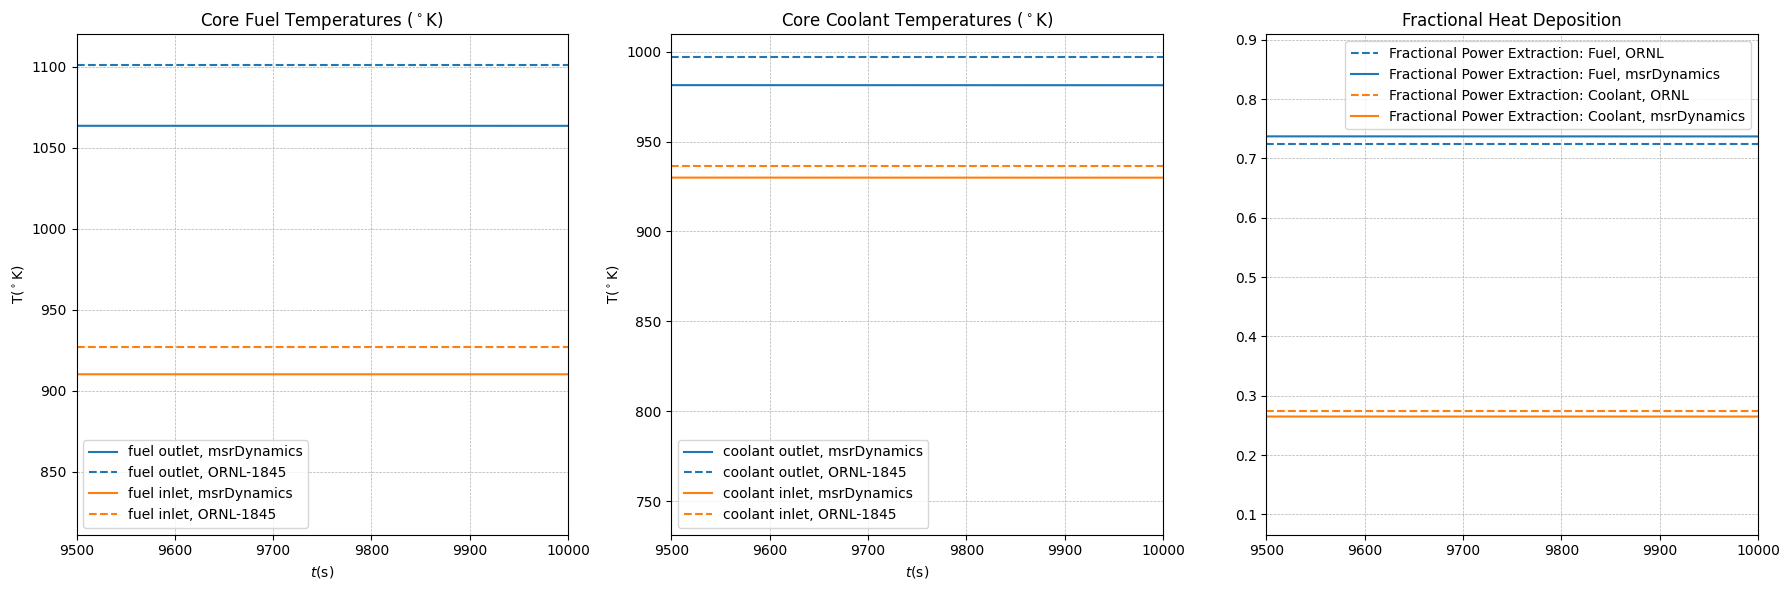

In [12]:
fig,axs = plt.subplots(1,3,figsize=(18,6))

t_0 = 9500
t_f = 10000

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_xlim([t_0, t_f])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)
    ax.set_yscale(y_scale)

# Core Node Temperatures
update_axis_style(axs[0], r"Core Fuel Temperatures ($^\circ$K)")
axs[0].set_xlim([t_0,t_f])
axs[0].plot(T,[s[c_f2.index] for s in sol_jit2],label="fuel outlet, msrDynamics",color=colors[0]) 
axs[0].axhline(y=F_to_K(1522),label="fuel outlet, ORNL-1845",linestyle="--",color=colors[0]) 
axs[0].plot(T,[(s[hx_fh1_f2.index]+s[hx_fh2_f2.index])/2 for s in sol_jit2],label="fuel inlet, msrDynamics",color=colors[1]) 
axs[0].axhline(y=F_to_K(1209),label="fuel inlet, ORNL-1845",linestyle="--",color=colors[1]) 
axs[0].set_xlabel(r"$t$(s)")
axs[0].set_ylabel(r"T($^\circ$K)")
axs[0].legend()

# Core Node Temperatures
update_axis_style(axs[1], r"Core Coolant Temperatures ($^\circ$K)")
axs[1].set_xlim([t_0,t_f])
axs[1].plot(T,[s[c_c2.index] for s in sol_jit2],label="coolant outlet, msrDynamics",color=colors[0]) 
axs[1].axhline(y=F_to_K(1335),label="coolant outlet, ORNL-1845",linestyle="--",color=colors[0]) 
axs[1].plot(T,[(s[hx_ch1_c2.index]+s[hx_ch2_c2.index])/2 for s in sol_jit2],label="coolant inlet, msrDynamics",color=colors[1]) 
axs[1].axhline(y=F_to_K(1226),label="coolant inlet, ORNL-1845",linestyle="--",color=colors[1]) 
axs[1].set_xlabel(r"$t$(s)")
axs[1].set_ylabel(r"T($^\circ$K)")
axs[1].legend()

# Core Node Temperatures
update_axis_style(axs[2], r"Fractional Heat Deposition")
axs[2].set_xlim([t_0,t_f])
axs[2].axhline(y=1.52/2.1,label="Fractional Power Extraction: Fuel, ORNL",linestyle="--",color=colors[0])
axs[2].plot(T,[(s[c_f2.index]-(s[hx_fh1_f2.index]+s[hx_fh2_f2.index])/2)*W_f*scp_f/(P*s[n.index]) for s in sol_jit2],label="Fractional Power Extraction: Fuel, msrDynamics") 
axs[2].axhline(y=0.577/2.1,label="Fractional Power Extraction: Coolant, ORNL",linestyle="--",color=colors[1])
axs[2].plot(T,[(s[c_c2.index]-(s[hx_ch1_c2.index]+s[hx_ch2_c2.index])/2)*W_c*scp_c/(P*s[n.index]) for s in sol_jit2],label="Fractional Power Extraction: Coolant, msrDynamics",color=colors[1]) 
axs[2].legend()



plt.tight_layout()



In [ ]:
(((sol_jit2[-1][c_f2.index]-sol_jit2[-1][hx_fh1_f2.index]))*W_f*scp_f)/(P*n.y_out[-1])

In [ ]:
(sol_jit2[-1][c_f2.index]-sol_jit2[-1][hx_fh1_f2.index])*W_f*scp_f/(P*n.y_out[-1])

In [ ]:
(sol_jit2[-1][c_c2.index]-sol_jit2[-1][hx_ch1_c2.index])*W_c*scp_c/(P*n.y_out[-1])

In [ ]:
(((F_to_K(1335)-F_to_K(1226))*W_c*scp_c) + (F_to_K(1522)-F_to_K(1209))*W_f*scp_f)

In [ ]:
((F_to_K(1335)-F_to_K(1226))*W_c*scp_c)

In [ ]:
r_c = coolant_density(F_to_K(1280))
((F_to_K(1335)-F_to_K(1226))*r_c*F_c_c*scp_c)

In [ ]:
c_f2.index

In [ ]:
hx_ch1_c2.index